<a href="https://colab.research.google.com/github/DanielaRandazo/coderhouse/blob/main/Data_Wrangling_Daniela_Randazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB
# DATA WRANGLING


In [1]:
from google.colab import drive
drive.mount('/CoderHouse')

Mounted at /CoderHouse


# Importo Librerias

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
DF_IMDB = pd.read_csv('/CoderHouse/MyDrive/CoderHouse/IMDB.csv')

In [3]:
print(DF_IMDB.columns)

Index(['Unnamed: 0', 'index', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'ordering', 'title', 'region',
       'language', 'types', 'attributes', 'isOriginalTitle', 'Description'],
      dtype='object')



# ***Analisis y evolucion de la industria cinematografica a nivel mundial en las ultimas decadas***
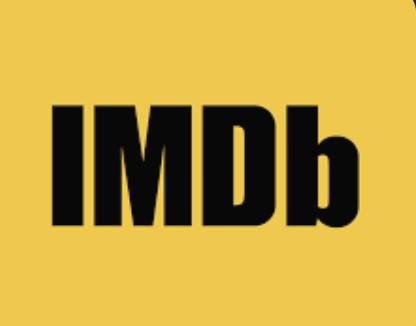


# Analisis de valores nulos:

In [4]:
DF_IMDB.dtypes

Unnamed: 0           int64
index                int64
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult              int64
startYear            int64
endYear             object
runtimeMinutes      object
genres              object
averageRating      float64
numVotes             int64
ordering             int64
title               object
region              object
language            object
types               object
attributes          object
isOriginalTitle      int64
Description         object
dtype: object

In [5]:
DF_IMDB.isna().sum()

Unnamed: 0           0
index                0
tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
averageRating        0
numVotes             0
ordering             0
title                0
region               0
language             0
types                0
attributes           0
isOriginalTitle      0
Description        188
dtype: int64

In [7]:
#Evaluation of missing Data
#"True" stands for missing value, while "False" stands for not missing value.

missing_data = DF_IMDB.isnull()
missing_data.head(5)

,Unnamed: 0,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,Description
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Count missing values in each column


for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    7850
Name: Unnamed: 0, dtype: int64

index
False    7850
Name: index, dtype: int64

tconst
False    7850
Name: tconst, dtype: int64

titleType
False    7850
Name: titleType, dtype: int64

primaryTitle
False    7850
Name: primaryTitle, dtype: int64

originalTitle
False    7850
Name: originalTitle, dtype: int64

isAdult
False    7850
Name: isAdult, dtype: int64

startYear
False    7850
Name: startYear, dtype: int64

endYear
False    7850
Name: endYear, dtype: int64

runtimeMinutes
False    7850
Name: runtimeMinutes, dtype: int64

genres
False    7850
Name: genres, dtype: int64

averageRating
False    7850
Name: averageRating, dtype: int64

numVotes
False    7850
Name: numVotes, dtype: int64

ordering
False    7850
Name: ordering, dtype: int64

title
False    7850
Name: title, dtype: int64

region
False    7850
Name: region, dtype: int64

language
False    7850
Name: language, dtype: int64

types
False    7850
Name: types, dtype: int64

attributes
False    7850
Name: a

Based on the query above we can see that only Description has missing data.
All the other columns don't have missing date.

In [19]:
#print(DF_IMDB['Description'])


filas_nulas = DF_IMDB[DF_IMDB['Description'].isnull()]

# Imprimir las filas con valores nulos en 'nombre_columna'
print(filas_nulas)

      Unnamed: 0  index      tconst  titleType        primaryTitle  \
47            47    167   tt0919370  tvEpisode           Encounter   
50            50    177   tt0947906  tvEpisode               Wager   
52            52    181   tt0950513  tvEpisode           Execution   
54            54    190   tt0990612  tvEpisode             Revival   
82            82    281  tt11866324      movie                Prey   
...          ...    ...         ...        ...                 ...   
7769        7769  10176   tt7843600      movie          Fyre Fraud   
7778        7778  10185   tt8015444      movie  Last and First Men   
7799        7799  10211   tt8359842      movie   It Must Be Heaven   
7828        7828  10246   tt9118930   tvSeries           Wild Bill   
7837        7837  10259   tt9581076      movie     So Long, My Son   

           originalTitle  isAdult  startYear endYear runtimeMinutes  ...  \
47              Sesshoku        0       2006      \N             23  ...   
50     